<font size='5px' color='red'>K-Nearest<font/>

<font size='5px' color='blue'>1 Introduction<font/>

## Defination 
    KNN(K Nearest Neighbors): is a classification algorithm.

## How it Works

- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. 
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity.K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.




http://www.datasciencelovers.com/machine-learning/k-nearest-neighbors-knn-theory/#:~:text=K%2DNN%20algorithm%20assumes%20the,point%20based%20on%20the%20similarity.

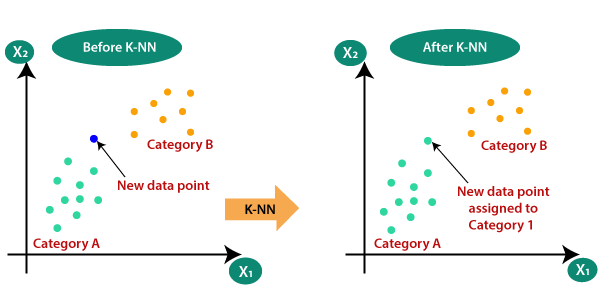

In [4]:
Image('k-nearest-neighbor2.png')

## How does K-NN work?
- To implement KNN algorithm you need to follow following steps.

    - Step-1: Select the number K of the neighbors
    - Step-2: Calculate the Euclidean distance of K number of neighbors
    - Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
    - Step-4: Among these k neighbors, count the number of the data points in each category.
    - Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
    - Step-6: Our model is ready.

## Notes:
- Data should be sorted first
- Define a threshold K, which defines how many points we look at 
    - The larger the K the more points we look at which will lead you to soomther Decision boundary, and less noise 
    - More K means Bias, and less K means noise(Over fitting)

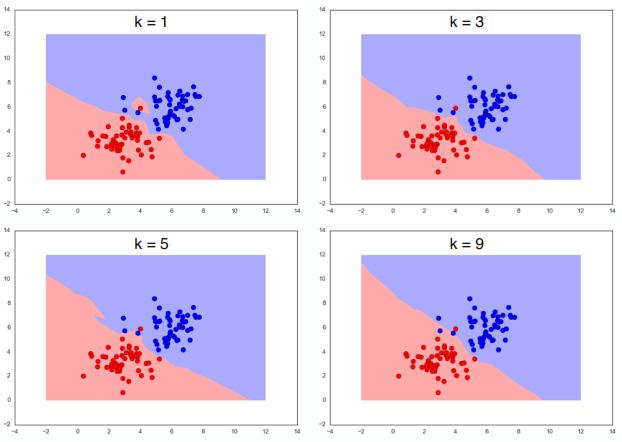

In [6]:
Image('1_fFKbGPgzexQ8Tzpm5FEMrg.png')

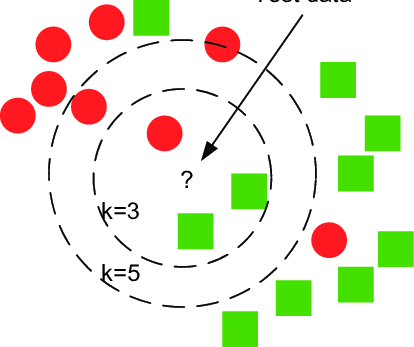

In [7]:
Image('K-Nearest-Neighbor-Illustration.png')
    # The larger the k the more points you look at
    # K larger allows for missclassification


## Adv:
   - Works for any number of classes
   - Few parameters
        - K
        - Distance Metric: how you calculate the distance form new point to old point



## Cons:
   - Expensive
   - Not good with high dimensional data( you won't be able to measure distance)
   - Categorical Features don't work well

<font size='5px' color='Blue'> 2 Classification with KNN EX<font/>


- We will work with classified data ( Take home tasks). 
- Our target is to know number of clusters, and there location for predition. 
- There is no theta

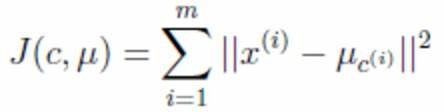

In [74]:
Image('th.jpeg')
    # Distorsion function that we want to minimize

## 2.1 Packages

In [4]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import Image

In [6]:
Classified=pd.read_csv('Classified Data',index_col=0)

In [7]:
Classified.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 2.2 Preprocessing 
    
## 2.2.1 Scaling 
    
- Scale of variable here matters a lot, as you will  calculate the distance. 
- As, Larger scale variable will affect the distance of observation for other variables

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
Scaler=StandardScaler()
    # It's created by the same method as models

In [14]:
Scaler.fit(Classified.drop('TARGET CLASS',axis=1))

StandardScaler()

In [15]:
scaled_features=Scaler.transform(Classified.drop('TARGET CLASS',axis=1))
    # It performs standarization by centering, and scaling

In [16]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
Classified_Scaled=pd.DataFrame(scaled_features,columns=Classified.columns[:-1])
    # Slice notation removes the last column's name from the list 

In [54]:
Classified_Scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


## 2.2.2 Split the data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=Classified_Scaled

In [27]:
y=Classified['TARGET CLASS']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 2.3 Training

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
Knn=KNeighborsClassifier(n_neighbors=1)
    # You will identify number of neighbors(K) you want for this model

In [34]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## 2.4 Prediction

In [35]:
predictions=Knn.predict(X_test)

In [36]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

## 2.5 Evaluation

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))
    # here we can see that our model is pretty good with K=1

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [76]:
print(confusion_matrix(y_test,predictions))

[[151   8]
 [ 15 126]]


<font size='5px' color='blue'>3 Introduce Elbow Method<font/>

## 3.1 Selecting New K

- To choose a better cluster we will ilterate through many model , and choose the one with the lowest error_rate

In [39]:
from sklearn import metrics
error_rate=[]
    #error_rate=[] will intialize error_rate 
for i in range(1,40):
    k_elbow=KNeighborsClassifier(n_neighbors=i)
    k_elbow.fit(X_train,y_train)
    pred=k_elbow.predict(X_test)
    error_rate.append(metrics.mean_squared_error(y_test,pred))
        # The average of when my preditction didn't equal the mean value

Text(0, 0.5, 'Error Rate')

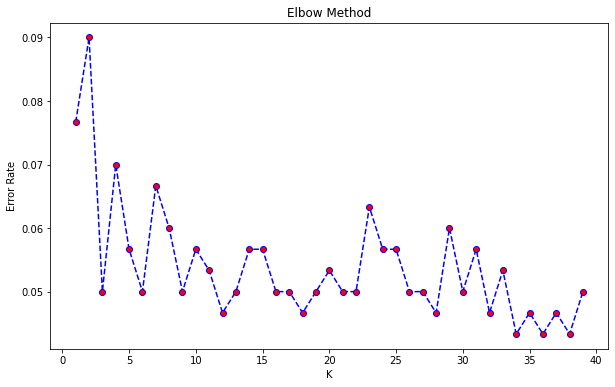

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Error Rate')

Or, use:

error_rate=[]

    #error_rate=[] will intialize error_rate 
for i in range(1,40):

    k_elbow=KNeighborsClassifier(n_neighbors=i)
    k_elbow.fit(X_train,y_train)
    pred=k_elbow.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
        # The average of when my preditction didn't equal the mean value
    

## 3.2 Implement New K
    
- K=17 from the graph

## 3.2.1 Training & Prediction

In [42]:
Knn=KNeighborsClassifier(n_neighbors=17)
Knn.fit(X_train,y_train)
Knn.fit(X_train,y_train)
predictions=Knn.predict(X_test)

## 3.2.2 Evaluation

In [43]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[153   6]
 [  9 132]]
